In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import seaborn as sns
import io #Used as buffer

In [2]:
nn_p=5
nn_w = 5
nn_tw = 1
m = 'arr'
freq = 5

In [3]:
df = get_data(m)
df = df[(df['nnw']==str(nn_w))&(df['nntw']==str(nn_tw))&(df['nnp']==str(nn_p))|(df['isnn']==False)]

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
df.rename({'0':m}, axis=1, inplace=True)

# Functions

# Plots

In [5]:
df_pivot = get_heatmap_data(m, df)[labels_order]
# df_pivot.sort_values('method') #df.sort_values('method')

In [6]:
df_pivot=df_pivot.query(f'freq=={freq} or freq==10')#freq>{freq} and freq<{20}

In [7]:
df_pivot_rank = df_pivot.rank(axis=1, ascending=False)

In [8]:
df_pivot_rank.style.background_gradient(cmap=plt.cm.Greens, axis=1)

In [9]:
summary = df_pivot_rank.groupby(['experiment']).mean() #,'function'

summary.round(2).style.background_gradient(cmap=plt.cm.Greens, axis=1)

method,noNN_RI,NN_RI,noNN_HMu,NN_HMu,noNN_No,NN_No,noNN_CwN,NN_CwN,noNN_Rst,NN_Rst
experiment,,,,,,,,,,
exp1,1.67,4.67,2.67,4.17,10,7.5,8.33,8,4.17,3.83
exp2,2.33,4.33,2.17,3.67,5.83,4.67,9.67,7.5,7.67,7.17
exp3,3.67,4,2.83,4.5,6,6.17,9.33,9.33,5,4.17
exp4,2.83,6,4.17,4.33,9.5,5,9.5,7.17,2.33,4.17


In [10]:
summary.round(2).style.highlight_min(axis=1)

method,noNN_RI,NN_RI,noNN_HMu,NN_HMu,noNN_No,NN_No,noNN_CwN,NN_CwN,noNN_Rst,NN_Rst
experiment,,,,,,,,,,
exp1,1.67,4.67,2.67,4.17,10,7.5,8.33,8,4.17,3.83
exp2,2.33,4.33,2.17,3.67,5.83,4.67,9.67,7.5,7.67,7.17
exp3,3.67,4,2.83,4.5,6,6.17,9.33,9.33,5,4.17
exp4,2.83,6,4.17,4.33,9.5,5,9.5,7.17,2.33,4.17


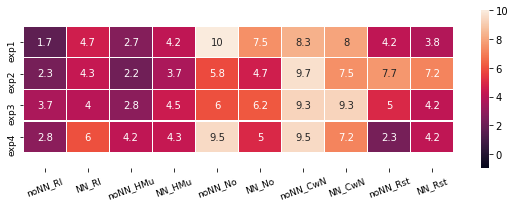

In [39]:
fig,ax = plt.subplots(figsize=(8,3))
sns.heatmap(summary, annot=True, linewidths=.2, ax=ax, cmap=sns.cm.rocket, vmin=-1)
u,l = ax.get_ylim()
ax.set_ylim(u+0.5, l-0.5)
ax.set_ylabel('')
ax.set_xlabel('')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(9)
    tick.label.set_rotation(20)
    
for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(9)
plt.tight_layout()
fig.savefig(PATH_RESULTS/'heatmapRankARR.eps', dpi=400, format='eps')